# Introduction

This project will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.

The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Here are a few questions that this project will seek to answer:

+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?
+ What is the distribution of that life expectancy?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("all_data.csv")
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [4]:
df.describe

<bound method NDFrame.describe of      Country  Year  Life expectancy at birth (years)           GDP
0      Chile  2000                              77.3  7.786093e+10
1      Chile  2001                              77.3  7.097992e+10
2      Chile  2002                              77.8  6.973681e+10
3      Chile  2003                              77.9  7.564346e+10
4      Chile  2004                              78.0  9.921039e+10
..       ...   ...                               ...           ...
91  Zimbabwe  2011                              54.9  1.209845e+10
92  Zimbabwe  2012                              56.6  1.424249e+10
93  Zimbabwe  2013                              58.0  1.545177e+10
94  Zimbabwe  2014                              59.2  1.589105e+10
95  Zimbabwe  2015                              60.7  1.630467e+10

[96 rows x 4 columns]>

How many countries do we have on our table?

In [5]:
df['Country'].value_counts()

Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: Country, dtype: int64

What years do we have information?

In [6]:
df['Year'].value_counts()

2000    6
2001    6
2002    6
2003    6
2004    6
2005    6
2006    6
2007    6
2008    6
2009    6
2010    6
2011    6
2012    6
2013    6
2014    6
2015    6
Name: Year, dtype: int64

In [7]:
df = df.rename({'Life expectancy at birth (years)': 'LEB'}, axis = "columns" )
df.head()

,Country,Year,LEB,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


Let's build a distribution histogram GDP.

# Hist plots

Text(0.5, 1.0, 'GDP in Trillions dollars USA')

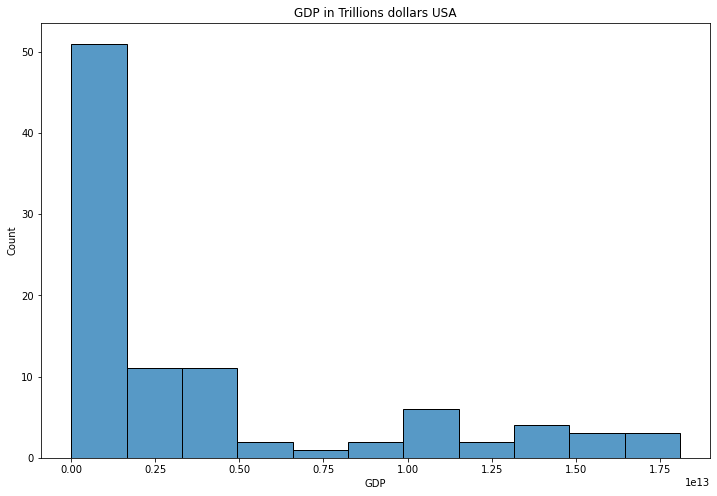

In [8]:
plt.figure(figsize = (12,8))
sns.histplot(data = df, x = 'GDP')
plt.title('GDP in Trillions dollars USA')

<AxesSubplot:xlabel='GDP', ylabel='Density'>

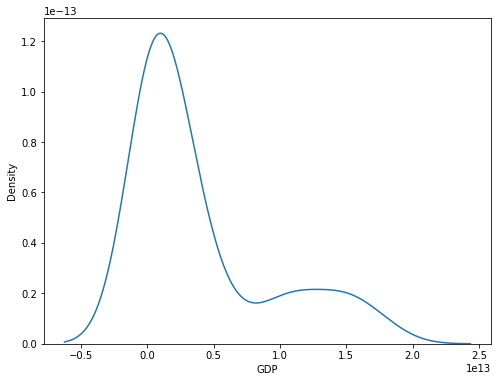

In [9]:
plt.figure(figsize=(8,6))
sns.kdeplot(df['GDP'])

We see that GDP distribution has right skewed.

Text(0.5, 1.0, 'Life expectancy at birth (years)')

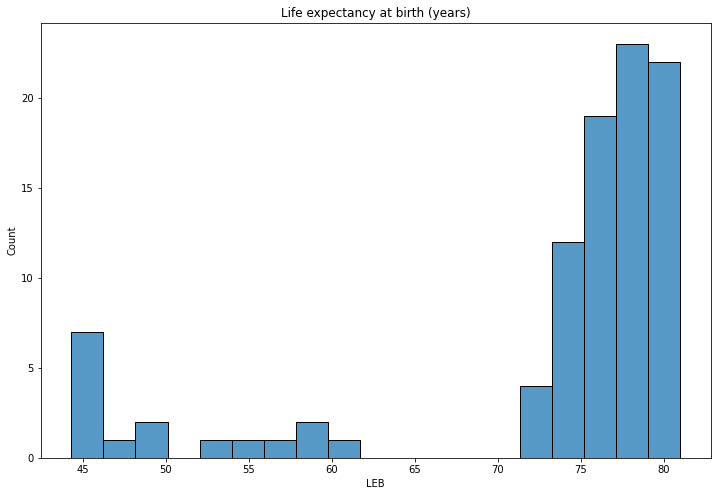

In [10]:
plt.figure(figsize = (12,8))
sns.histplot(data = df, x = 'LEB')
plt.title('Life expectancy at birth (years)')

<AxesSubplot:xlabel='LEB', ylabel='Density'>

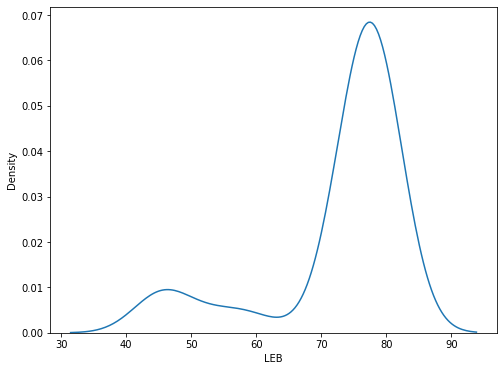

In [11]:
plt.figure(figsize=(8,6))
sns.kdeplot(df['LEB'])

We see that the distribution of life expectancy, has left skewed. Obviously, the higher the GDP, the higher the life expectancy.

In [12]:
df['GDP_billions'] = df['GDP']/(10**9)
df.head()

,Country,Year,LEB,GDP,GDP_billions
0,Chile,2000,77.3,7.786093e+10,77.860932
1,Chile,2001,77.3,7.097992e+10,70.979924
2,Chile,2002,77.8,6.973681e+10,69.736811
3,Chile,2003,77.9,7.564346e+10,75.643460
4,Chile,2004,78.0,9.921039e+10,99.210393


# Scatter plots

Let's build a scatterplot GDP_billins and LEB.

Text(0.5, 1.0, 'GDP & Life expectancy.')

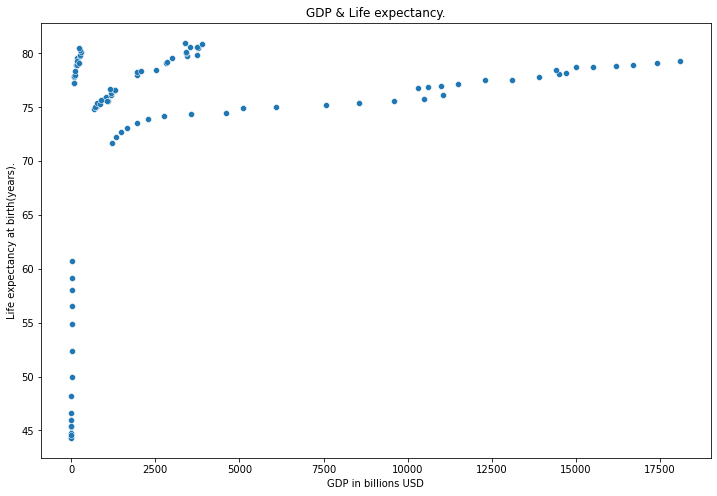

In [13]:
plt.figure(figsize = (12,8))
sns.scatterplot(data = df, x = 'GDP_billions', y = "LEB")
plt.ylabel('Life expectancy at birth(years).')
plt.xlabel('GDP in billions USD')
plt.title('GDP & Life expectancy.')

On the graph, we see four groups of points. Let's take a look at the properties of these groups.

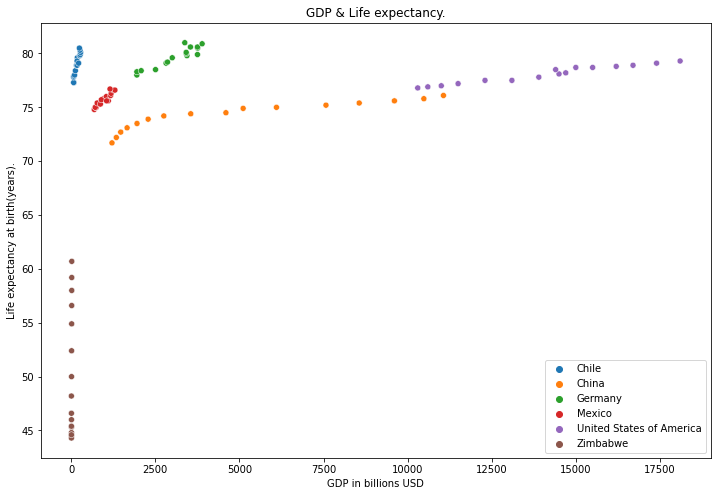

In [14]:
plt.figure(figsize = (12,8))
sns.scatterplot(data = df, x = 'GDP_billions', y = "LEB", hue = 'Country')
plt.ylabel('Life expectancy at birth(years).')
plt.xlabel('GDP in billions USD')
plt.title('GDP & Life expectancy.')
plt.legend()

Indeed, the groups are distributed by country. Let's define the main statistics for different countries and by year.

# Box plots

Let's build a boxplots GDP and Country.

Text(0.5, 1.0, 'GDP in Trillions dollars USA')

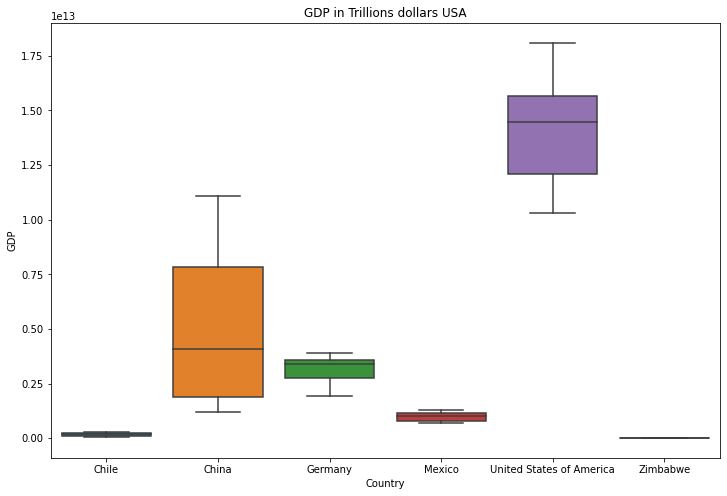

In [15]:
plt.figure(figsize = (12,8))
sns.boxplot(data=df, x= 'Country', y = 'GDP')
plt.title('GDP in Trillions dollars USA')

Let's build a boxplots life expectations and Country.

Text(0.5, 1.0, 'Life expectancy')

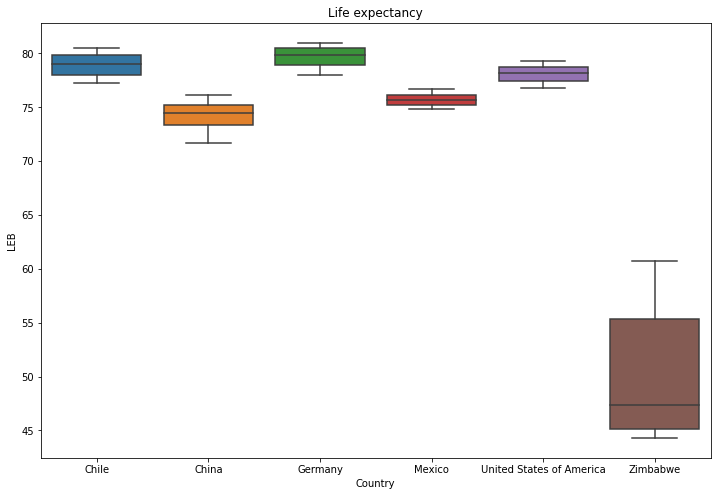

In [16]:
plt.figure(figsize = (12,8))
sns.boxplot(data=df, x= 'Country', y = 'LEB')
plt.title('Life expectancy')

# The main statistics for all countries and bar plots.

In [17]:
#Average GDP in countries
means = df.groupby('Country').GDP.mean()
means.head()

Country
Chile                       1.697888e+11
China                       4.957714e+12
Germany                     3.094776e+12
Mexico                      9.766506e+11
United States of America    1.407500e+13
Name: GDP, dtype: float64

In [18]:
#Max life expectancy in countries
max_years = df.groupby('Country').LEB.max()
max_years

Country
Chile                       80.5
China                       76.1
Germany                     81.0
Mexico                      76.7
United States of America    79.3
Zimbabwe                    60.7
Name: LEB, dtype: float64

In [19]:
#Min life expectancy in countries
min_years = df.groupby('Country').LEB.min()
min_years

Country
Chile                       77.3
China                       71.7
Germany                     78.0
Mexico                      74.8
United States of America    76.8
Zimbabwe                    44.3
Name: LEB, dtype: float64

Text(0.5, 1.0, 'GDP in Trillions dollars USA')

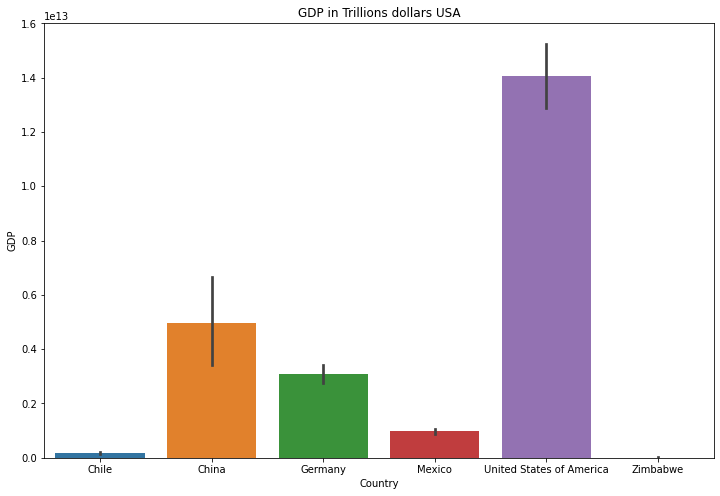

In [20]:
plt.figure(figsize=(12,8))
sns.barplot(data = df, x= 'Country', y = 'GDP')
plt.title("GDP in Trillions dollars USA")

Text(0.5, 1.0, 'Life expectancy at birth (years)')

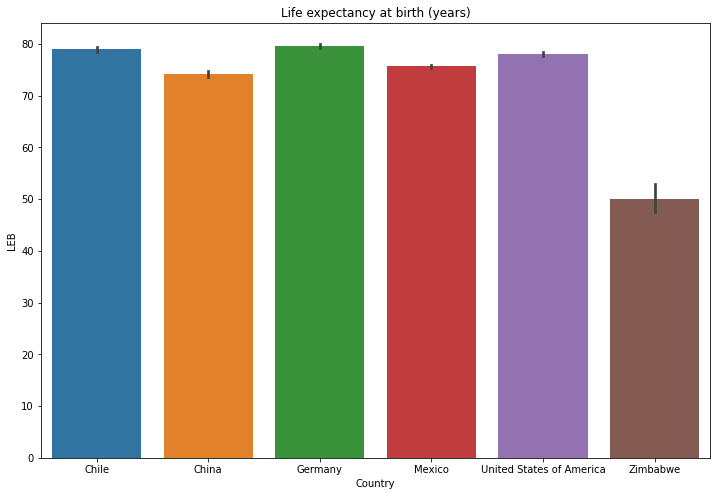

In [21]:
plt.figure(figsize=(12,8))
sns.barplot(data = df, x= 'Country', y = 'LEB')
plt.title('Life expectancy at birth (years)')

How life expectancy changes over the years

Text(0.5, 1.0, 'How life expectancy changes over the years')

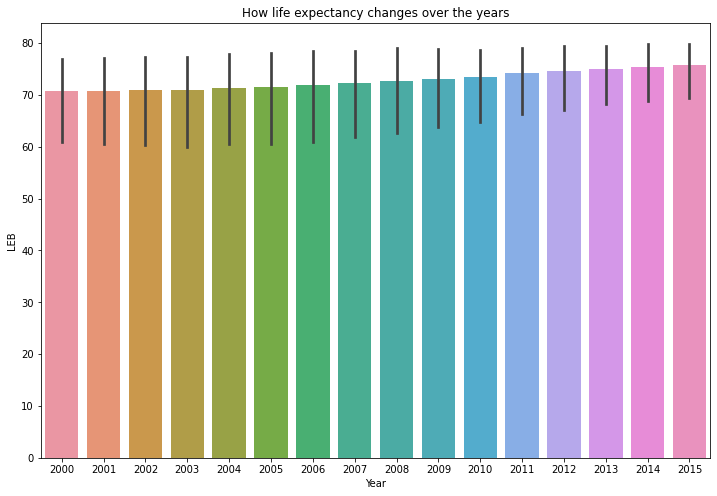

In [22]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='Year', y = 'LEB')
plt.title('How life expectancy changes over the years')

In [23]:
How GDP changes over the years

SyntaxError: invalid syntax (2379370322.py, line 1)

Text(0.5, 1.0, 'How GDP changes over the years')

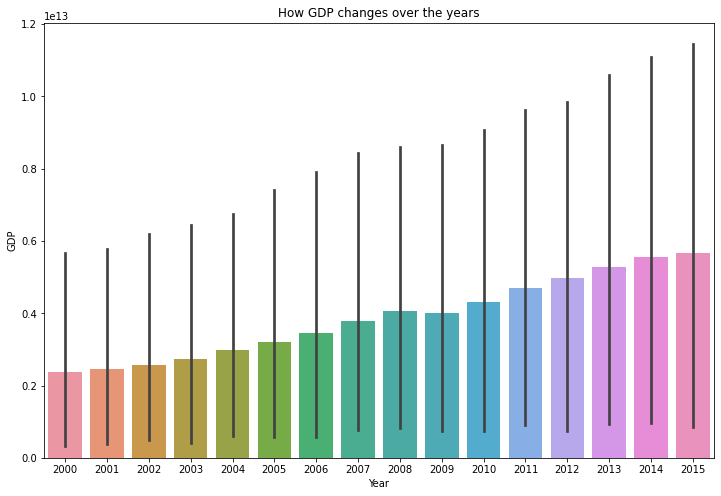

In [24]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='Year', y = 'GDP')
plt.title('How GDP changes over the years')

# Violin plots

Text(0.5, 0, 'Life expectancy at birth (years)')

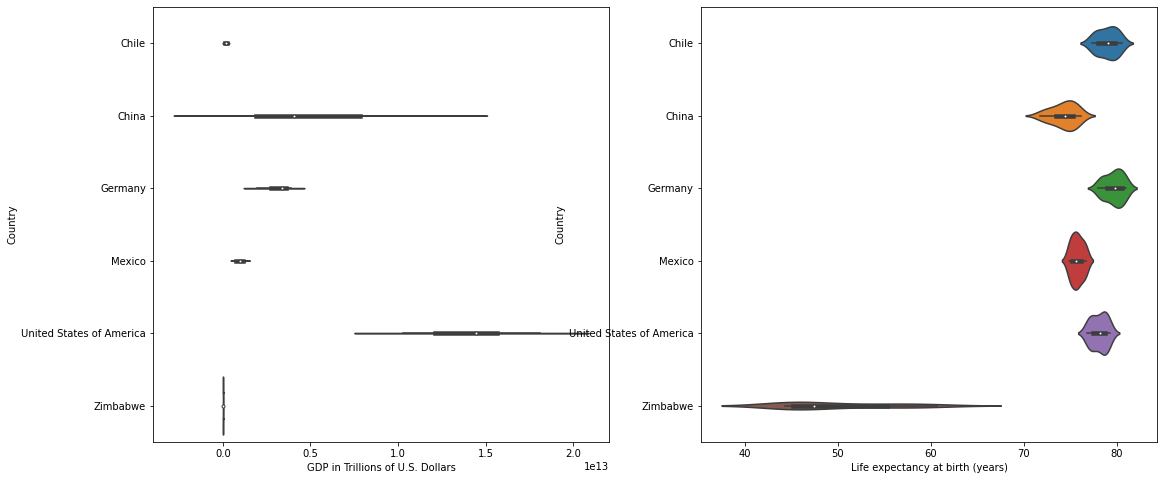

In [28]:
f, axs = plt.subplots(1,2,figsize = (18, 8))
axs[0] = sns.violinplot(data = df, x = 'GDP', y = 'Country', ax = axs[0])
axs[0].set_xlabel('GDP in Trillions of U.S. Dollars')
axs[1] = sns.violinplot(data = df, x = 'LEB', y = 'Country', ax = axs[1])
axs[1].set_xlabel('Life expectancy at birth (years)')


# Swarm plots

Text(0, 0.5, 'Life expectancy at birth (years)')

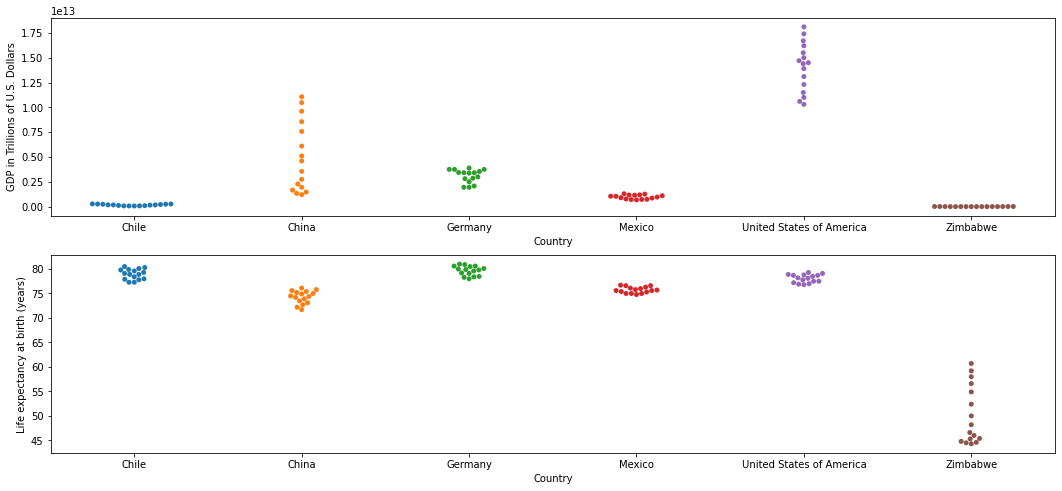

In [31]:
f, axs = plt.subplots(2,1, figsize = (18, 8))
axs[0] = sns.swarmplot(data = df, y = 'GDP', x = 'Country', ax = axs[0])
axs[0].set_ylabel('GDP in Trillions of U.S. Dollars')
axs[1] = sns.swarmplot(data = df, y = 'LEB', x = 'Country', ax = axs[1])
axs[1].set_ylabel('Life expectancy at birth (years)')

# Line plots

Let's see how GDP and life expectancy change from year to year by country

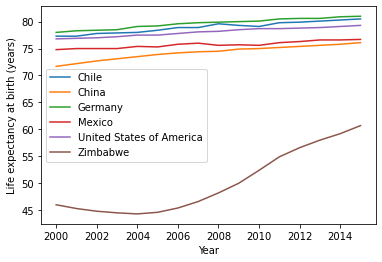

In [36]:
sns.lineplot(data=df, x='Year', y ='LEB',  hue = 'Country')
plt.ylabel('Life expectancy at birth (years)')
plt.legend()

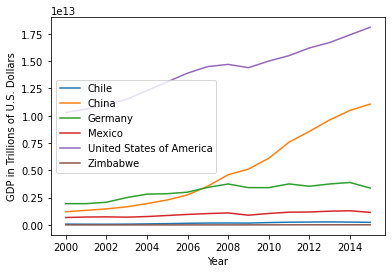

In [38]:
sns.lineplot(data=df, x='Year', y ='GDP',  hue = 'Country')
plt.ylabel('GDP in Trillions of U.S. Dollars')
plt.legend()

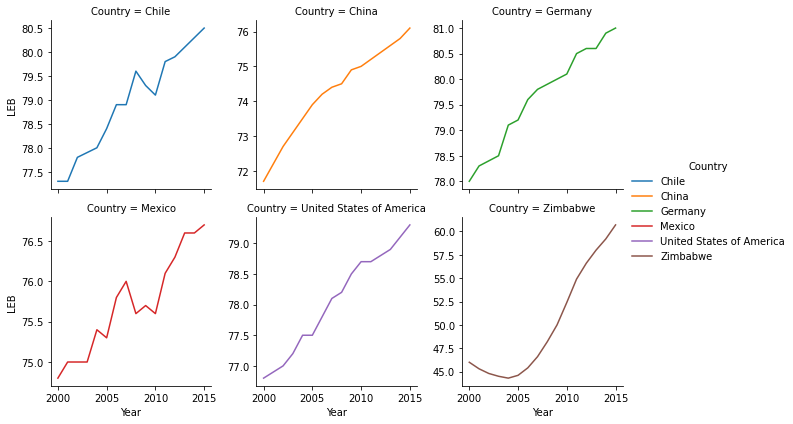

In [46]:
grid = sns.FacetGrid(data = df, col = 'Country', hue = 'Country', col_wrap=3, sharey = False)
grid.map(sns.lineplot, 'Year', 'LEB')
grid.add_legend()

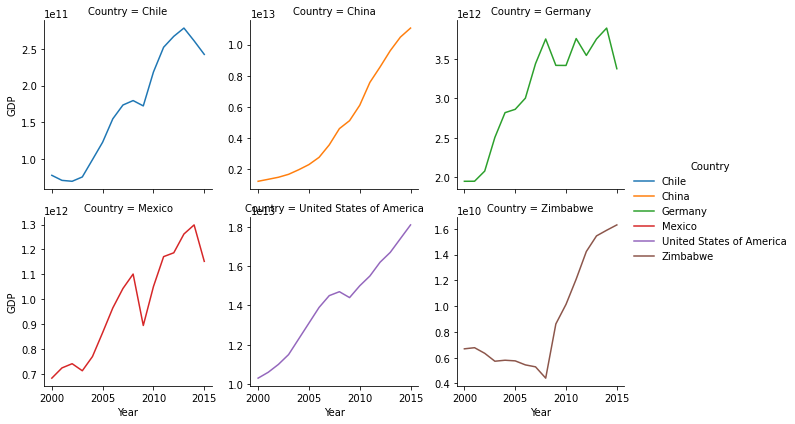

In [47]:
grid = sns.FacetGrid(data = df, col = 'Country', hue = 'Country', col_wrap = 3, sharey = False)
grid.map(sns.lineplot, 'Year', 'GDP')
grid.add_legend()

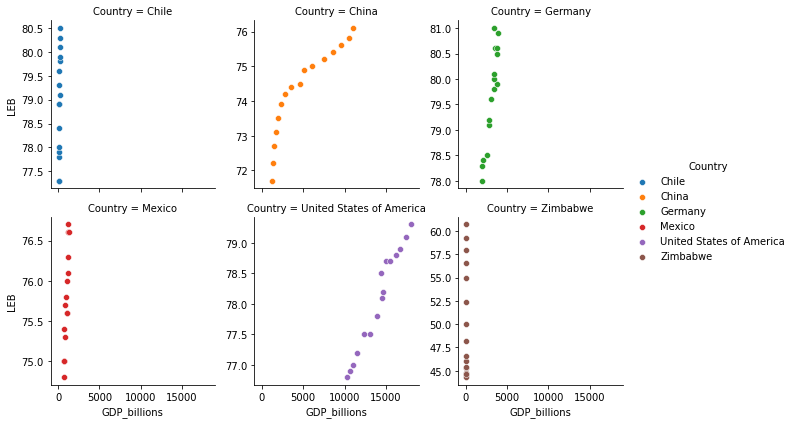

In [50]:
grid = sns.FacetGrid(data = df, col='Country', hue = 'Country', col_wrap = 3, sharey = False)
grid.map(sns.scatterplot, 'GDP_billions', 'LEB')
grid.add_legend()

Let's determine the correlation coefficient is general and separate for each country

In [53]:
print('Correlation coefficient GDP & LEB: {}'.format(np.corrcoef(df.GDP, df.LEB)[0][1]))

Correlation coefficient GDP & LEB: 0.3432067484491559


In [89]:
corr_coef = []
index = []
for country in df['Country'].unique():
    corr = np.corrcoef(df[df['Country']==country].LEB,df[df['Country']==country].GDP)[0][1]
    index.append(country)
    corr_coef.append(corr)
df_corr = pd.DataFrame(data = {'corr_coef':corr_coef},index = index)
df_corr = df_corr[['corr_coef']].sort_values(by = 'corr_coef', ascending=False)

Text(0.5, 1.0, 'Correlation coefficient GDP & LEB')

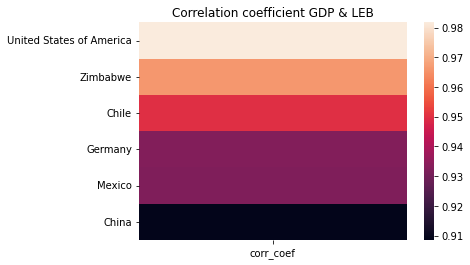

In [91]:
sns.heatmap(df_corr)
plt.title('Correlation coefficient GDP & LEB')

# Conclusions

Zimbabwe having the greatest increase.
GDP increased for all countries in our list, especially for China.
Positive correlation between GDP and life expectancy for countries in our list,
and hiegst correlation is in USA lowest correlation is in China.
Average life expectancy was between mid to high 70s for the countries except for Zimbabwe which was 50.
The life expectancy had a left skew, or most of the observations were on the right side.
Despite the low level of GDP, life expectancy in Chile is very high.
